# 神经网络(Neual Network)

In [1]:
import  tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as  opt

In [2]:
(train_images, train_labels) , (test_images , test_labels) = tf.keras.datasets.mnist.load_data()

这是数字: 8


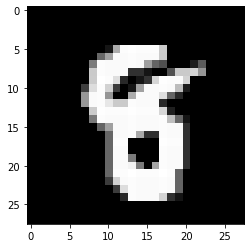

In [3]:
pick_one = np.random.randint( 0 , 5000) 
plt.imshow(train_images[pick_one] , "gray")
print("这是数字:" , train_labels[pick_one])

In [4]:

train_images = train_images[0:5000 , : , :] 
train_labels = train_labels[0:5000]
train_images.shape
train_images = train_images.reshape(5000, 28* 28)
print(train_images.shape)
print(train_labels.shape)


(5000, 784)
(5000,)


准备数据,为每个样本数据添加一个偏置层 $\theta_0$


In [5]:
X = np.insert(train_images , 0 ,values = np.ones(train_images.shape[0]) , axis = 1)
X.shape

(5000, 785)

向量化标签

In [6]:
y_matrix = [] 
for k in range (10):
    y_matrix.append((train_labels == k).astype(int))
y = np.array(y_matrix)
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

激活函数:sigmoid 
$$
    \sigma (z) = \frac{1}{1+e^(-z)}
$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

损失函数:
$
    J(\theta) = \frac{1}{m}\sum_{i = 1}^m[-y^{i}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log( 1 - h_{\theta}(x^{(i)}))]
$

In [8]:
def cost (theta, X , y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - ( 1 - y) * np.log(1- sigmoid(X @ theta))) 

In [9]:
def regularized_cost(theta, X ,y , lamda = 1):
    theta_j1_to_n = theta[1:]
    regulaized_term = lamda / (2 * len(X)) * np.sum( theta_j1_to_n **2)
    return cost(theta , X , y) + regulaized_term

梯度 
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})- y^{(i)})x_j^{(i)} )
$$

In [10]:
def gradient(theta , X , y) : 
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)    

In [11]:
def regularized_gradient(theta, X , y , lamda = 1) : 
    theta_j1_to_n = theta[1:]
    regularized_theta = (1/len(X)) * theta_j1_to_n 
    regularized_term = np.concatenate([np.array([0]) , regularized_theta])
    return gradient(theta, X , y) + regularized_term 

In [12]:
def logistic_regression(X , y , l = 1):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun = regularized_cost , x0 = theta , args=(X,y,l),method="TNC" , jac=regularized_gradient , options={'disp':True})
    final_theta = res.x 
    return final_theta

In [13]:
def predict(x , theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [14]:
# Trainning

k_theta = np.array([logistic_regression(X , y[k]) for k in range(10)])
print(k_theta.shape)

<ipython-input-8-a1baf0d47222>:2: RuntimeWarning: divide by zero encountered in log
  return np.mean(-y * np.log(sigmoid(X @ theta)) - ( 1 - y) * np.log(1- sigmoid(X @ theta)))
<ipython-input-8-a1baf0d47222>:2: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-y * np.log(sigmoid(X @ theta)) - ( 1 - y) * np.log(1- sigmoid(X @ theta)))
(10, 785)


In [20]:
# 进行预测
prob_matrix = sigmoid( X @ k_theta.T)
print(X.shape , k_theta.T.shape , prob_matrix.shape)
y_pred = np.argmax(prob_matrix, axis=1)#返回沿轴axis最大值的索引，axis=1代表行

(5000, 785) (785, 10) (5000, 10)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(train_labels , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       479
           1       0.98      0.99      0.98       563
           2       0.97      0.95      0.96       488
           3       0.96      0.95      0.95       493
           4       0.98      0.97      0.98       535
           5       0.96      0.94      0.95       434
           6       1.00      1.00      1.00       501
           7       0.96      0.98      0.97       550
           8       0.94      0.95      0.95       462
           9       0.94      0.96      0.95       495

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000

